In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots display properly in Colab
%matplotlib inline

# Setting style for better visuals
sns.set_style("whitegrid")


In [2]:
# Loading the datasets

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

# Display first 5 rows of each dataset
print("Train Dataset:")
display(train.head())

print("Test Dataset:")
display(test.head())

print("Gender Submission Dataset:")
display(gender_submission.head())


Train Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test Dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Gender Submission Dataset:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Gender Submission shape:", gender_submission.shape)


Train shape: (891, 12)
Test shape: (418, 11)
Gender Submission shape: (418, 2)


In [6]:
# info
print("Train Dataset Info")
train.info()

print("\nTest Dataset Info")
test.info()

print("\nGender Submission Dataset Info")
gender_submission.info()


Train Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

In [7]:
# describe()
print("Train Dataset Statistical Summary:")
display(train.describe())

print("\nTest Dataset Statistical Summary:")
display(test.describe())


Train Dataset Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Test Dataset Statistical Summary:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Check Categorical Distributions (value_counts)
print("Survival Count:")
print(train["Survived"].value_counts())

print("\nPassenger Class Count:")
print(train["Pclass"].value_counts())

print("\nGender Count:")
print(train["Sex"].value_counts())

print("\nEmbarked Count:")
print(train["Embarked"].value_counts())


Survival Count:
Survived
0    549
1    342
Name: count, dtype: int64

Passenger Class Count:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Gender Count:
Sex
male      577
female    314
Name: count, dtype: int64

Embarked Count:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


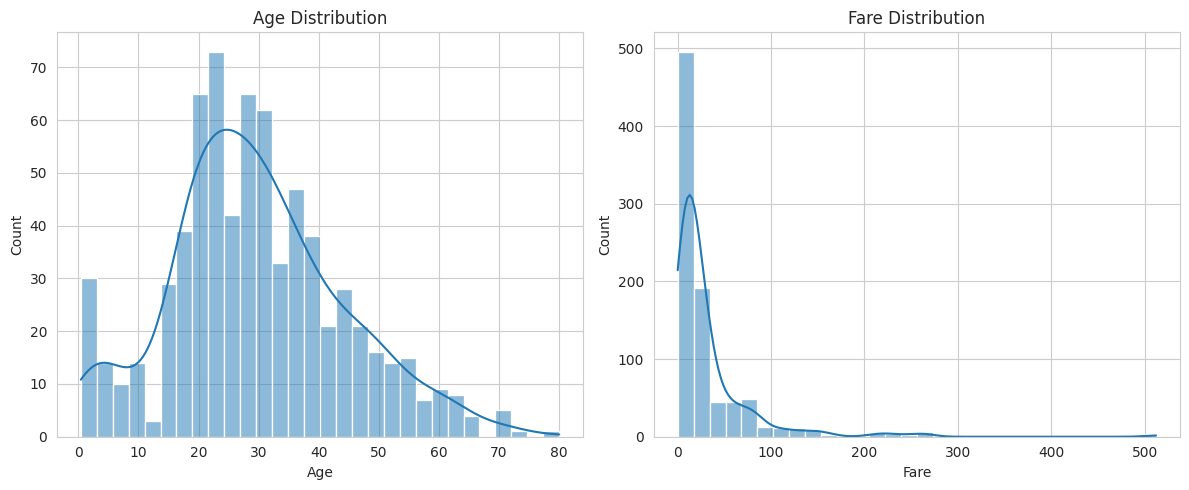

In [9]:
# Univariate Analysis (Histograms)
plt.figure(figsize=(12,5))

# Age Histogram
plt.subplot(1,2,1)
sns.histplot(train["Age"], bins=30, kde=True)
plt.title("Age Distribution")

# Fare Histogram
plt.subplot(1,2,2)
sns.histplot(train["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")

plt.tight_layout()
plt.show()


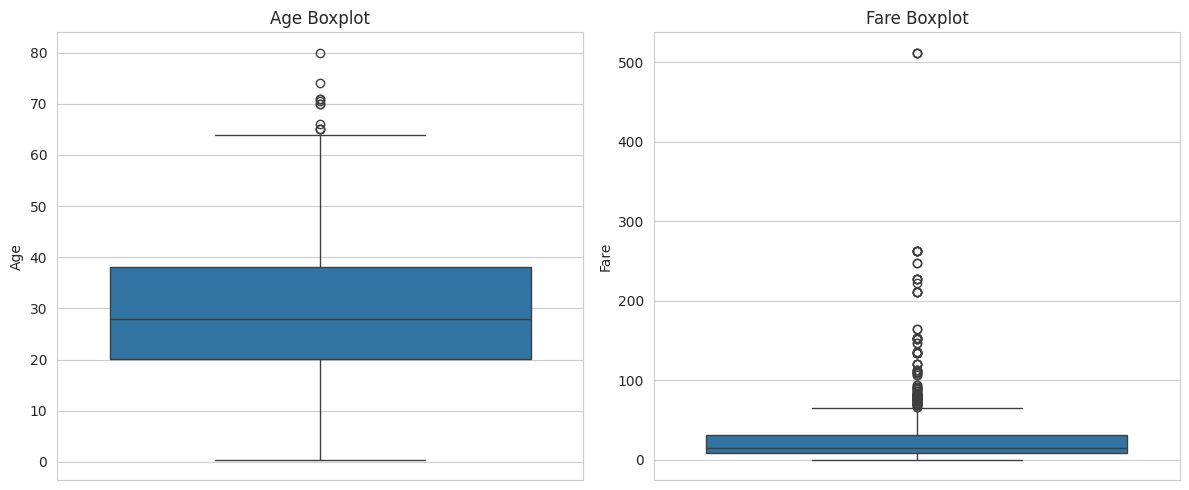

In [10]:
# Boxplots (Detect Outliers)
plt.figure(figsize=(12,5))

# Age Boxplot
plt.subplot(1,2,1)
sns.boxplot(y=train["Age"])
plt.title("Age Boxplot")

# Fare Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=train["Fare"])
plt.title("Fare Boxplot")

plt.tight_layout()
plt.show()


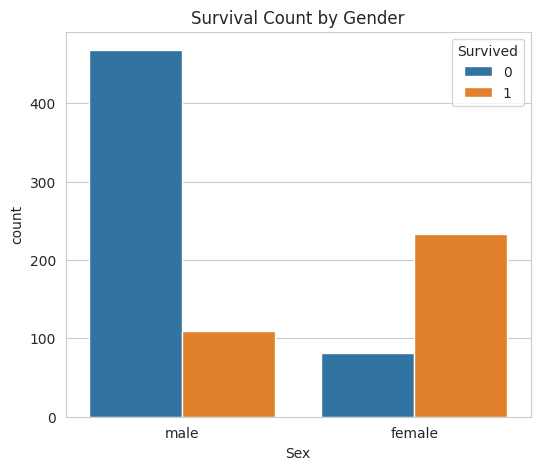

In [11]:
# Survival vs Gender (Very Important Insight)
plt.figure(figsize=(6,5))
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Count by Gender")
plt.show()


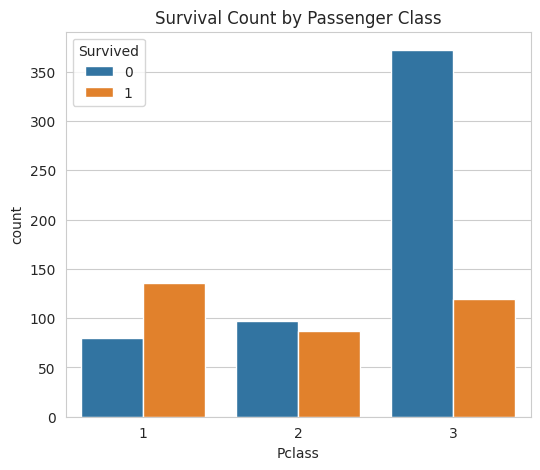

In [12]:
# Survival vs Passenger Class
plt.figure(figsize=(6,5))
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival Count by Passenger Class")
plt.show()


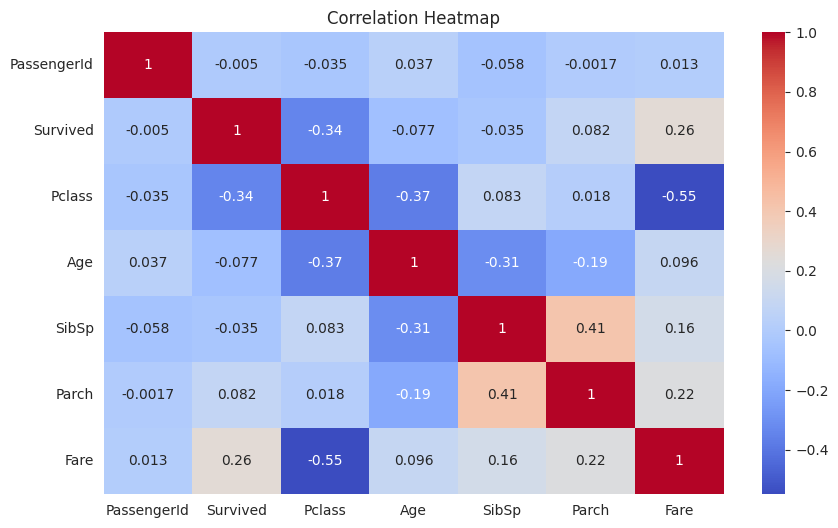

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


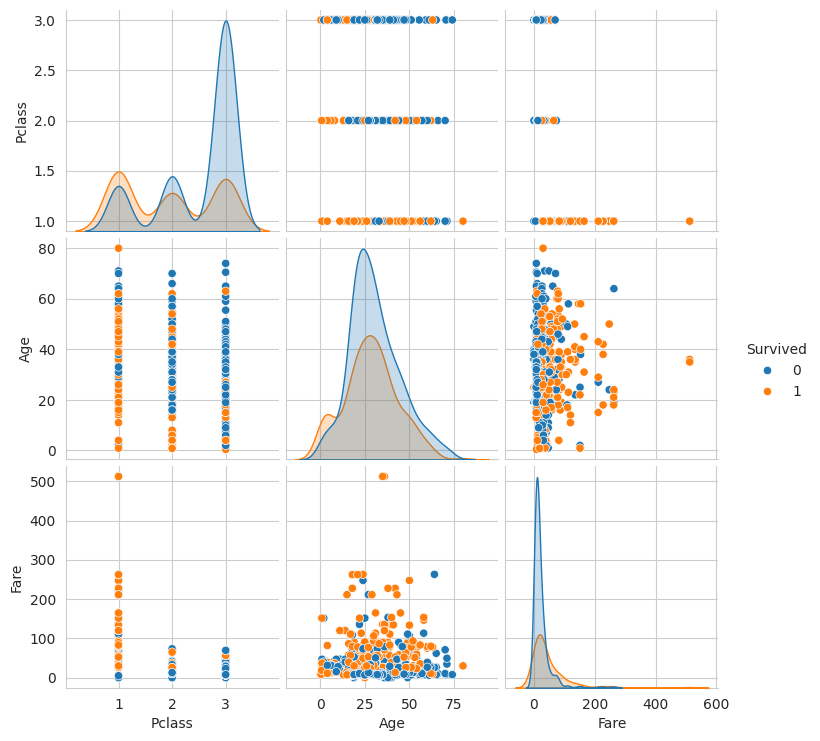

In [14]:
# Pairplot (Multivariate Analysis)
sns.pairplot(train[["Survived", "Pclass", "Age", "Fare"]], hue="Survived")
plt.show()
